In [1]:
import seaborn as sns
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from scipy.signal import square, stft

from scipy.signal.windows import gaussian


In [2]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler 

In [4]:
from DataLoader import *

In [5]:
from sklearn.pipeline import make_pipeline

In [6]:
from sklearn.neighbors import KNeighborsClassifier

In [7]:
from sklearn.model_selection import cross_val_score

In [8]:
from sklearn.model_selection import learning_curve

In [9]:
from sklearn.model_selection import cross_validate

In [10]:
from sklearn.metrics import accuracy_score

In [11]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

In [86]:
import pickle

In [12]:
from sklearn.model_selection import GridSearchCV
from scipy import stats

In [71]:
data_p = DataLoader().load_ACC_data(subject=subject_,event='morning')

<Axes: >

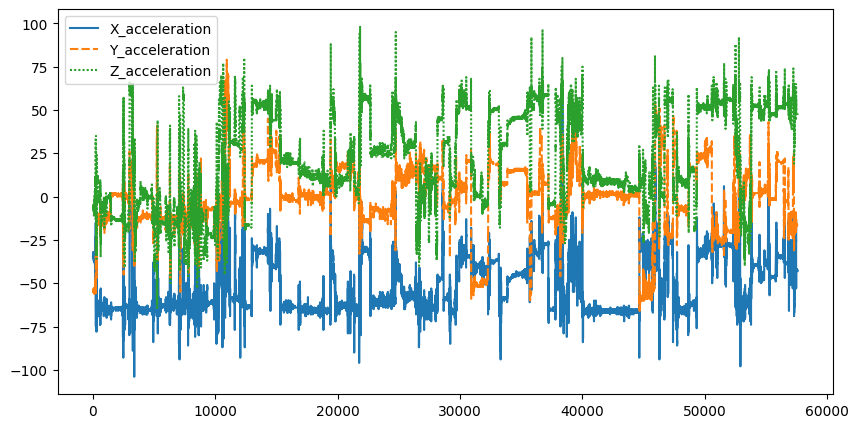

In [77]:
plt.figure(figsize=(10,5))
sns.lineplot(data_p.drop(columns='UNIX_time'))

In [13]:
datas = []
for i in range(1,24):
    subject_ = f's{i}'
    data = DataLoader().load_ACC_data(subject=subject_,event='morning')
    data.drop(columns='UNIX_time',inplace=True)
    data = data.to_numpy().flatten()
    datas.append(data)

In [14]:
datas_ = []
for i in range(1,24):
    subject_ = f's{i}'
    data = DataLoader().load_ACC_data(subject=subject_,event='evening')
    data.drop(columns='UNIX_time',inplace=True)
    data = data.to_numpy().flatten()
    datas_.append(data)

In [15]:
array = np.concatenate((datas, datas_), axis=0)

In [16]:
datas = pd.DataFrame(array)

In [78]:
datas.shape

(46, 172800)

In [17]:
def normalization(subject):
    num_transformer=make_pipeline(StandardScaler())
    num_transformer.fit(subject)
    return pd.DataFrame(num_transformer.transform(subject),columns=subject.columns)

In [18]:
df=normalization(datas)

In [19]:
X = df

In [20]:
info = pd.read_excel('data/general_info.xlsx')

In [21]:
sleepy_list = [11, 18, 0, 12, 10, 11, 5, 11, 2, 5, 9, 9, 17, 4, 2, 12, 12, 19, 13, 7, 11, 3, 5, 14, 14, 14, 12, 13, 11, 1, 11, 13, 11, 8, 19, 21, 22, 16, 15, 12, 26, 4, 19, 21, 18, 20]

sleepy_df = pd.DataFrame(sleepy_list)

In [22]:
sleepy_df["fatigue"] = sleepy_df[0]

sleepy_df = sleepy_df.drop(columns=0)

sleepy_df["is_tired"] = 0

sleepy_df['is_tired'] = (sleepy_df['fatigue'] > 11).astype(int)

In [23]:
y = sleepy_df.is_tired

In [24]:
y.value_counts()

is_tired
1    24
0    22
Name: count, dtype: int64

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 42)

In [26]:
def test_classifiers(X_train, y_train, X_test, y_test):
    models = {
        'MLP Classifier': MLPClassifier(),  ## --> This is your baseline = chance
        'Decision Tree': DecisionTreeClassifier(),
        'Logistic Regression': LogisticRegression(),
        'Random Forest': RandomForestClassifier(),
        'Gradient Boosting': GradientBoostingClassifier(),
        'K-Nearest Neighbors': KNeighborsClassifier()
        
    }

    results = {}

    for name, model in models.items():
        pipe = make_pipeline(model)
        pipe.fit(X_train, y_train)
        y_pred = pipe.predict(X_test)
        
        accuracy = accuracy_score(y_test, y_pred)
        
        report = classification_report(y_test, y_pred)
        
        results[name] = {
            'accuracy': accuracy,
            'report': report
        }
        
        print(f"{name}:\n")
        print(f"Accuracy: {accuracy}\n")
        print(f"Classification Report:\n{report}\n")
        
    return results

In [27]:
test_classifiers(X_train, y_train, X_test, y_test)

MLP Classifier:

Accuracy: 0.7142857142857143

Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.83      0.71         6
           1       0.83      0.62      0.71         8

    accuracy                           0.71        14
   macro avg       0.73      0.73      0.71        14
weighted avg       0.74      0.71      0.71        14


Decision Tree:

Accuracy: 0.6428571428571429

Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.67      0.62         6
           1       0.71      0.62      0.67         8

    accuracy                           0.64        14
   macro avg       0.64      0.65      0.64        14
weighted avg       0.65      0.64      0.64        14


Logistic Regression:

Accuracy: 0.6428571428571429

Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.67      0.62         6
           1       0.

{'MLP Classifier': {'accuracy': 0.7142857142857143,
  'report': '              precision    recall  f1-score   support\n\n           0       0.62      0.83      0.71         6\n           1       0.83      0.62      0.71         8\n\n    accuracy                           0.71        14\n   macro avg       0.73      0.73      0.71        14\nweighted avg       0.74      0.71      0.71        14\n'},
 'Decision Tree': {'accuracy': 0.6428571428571429,
  'report': '              precision    recall  f1-score   support\n\n           0       0.57      0.67      0.62         6\n           1       0.71      0.62      0.67         8\n\n    accuracy                           0.64        14\n   macro avg       0.64      0.65      0.64        14\nweighted avg       0.65      0.64      0.64        14\n'},
 'Logistic Regression': {'accuracy': 0.6428571428571429,
  'report': '              precision    recall  f1-score   support\n\n           0       0.57      0.67      0.62         6\n           1 

In [28]:
model = GradientBoostingClassifier()

In [54]:
param_grid = {
    'learning_rate': [0.01, 0.1, 0.05],
    'subsample': [0.8, 0.9, 1.0]
}

In [55]:
grid_search = GridSearchCV(estimator=model, 
                           param_grid=param_grid, 
                           cv=2, 
                           n_jobs=-1, 
                           verbose=2
             )

In [56]:
search = grid_search.fit(X_train, y_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..................learning_rate=0.01, subsample=0.9; total time=18.6min
[CV] END ...................learning_rate=0.1, subsample=0.8; total time= 8.3min
[CV] END ...................learning_rate=0.1, subsample=1.0; total time= 1.8min
[CV] END ..................learning_rate=0.05, subsample=0.8; total time= 4.7min
[CV] END ..................learning_rate=0.05, subsample=1.0; total time= 1.9min
[CV] END ..................learning_rate=0.01, subsample=0.8; total time=18.0min
[CV] END ..................learning_rate=0.01, subsample=1.0; total time= 1.7min
[CV] END ...................learning_rate=0.1, subsample=0.9; total time= 9.2min
[CV] END ..................learning_rate=0.05, subsample=0.8; total time= 4.7min
[CV] END ..................learning_rate=0.05, subsample=1.0; total time= 2.5min
[CV] END ..................learning_rate=0.01, subsample=0.8; total time=18.1min
[CV] END ..................learning_rate=0.01, su

In [79]:
search.best_estimator_

GradientBoostingClassifier(learning_rate=0.01, n_estimators=200)

In [80]:
model = GradientBoostingClassifier(learning_rate=0.01, n_estimators=200)

In [81]:
model.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.01, n_estimators=200)

In [82]:
y_pred = model.predict(X_test)

In [83]:
accuracy = accuracy_score(y_test, y_pred) 

In [84]:
report = classification_report(y_test, y_pred) 

In [85]:
print(f"Accuracy: {accuracy}\n")
print(f"Classification Report:\n{report}\n")

Accuracy: 0.7142857142857143

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.67      0.67         6
           1       0.75      0.75      0.75         8

    accuracy                           0.71        14
   macro avg       0.71      0.71      0.71        14
weighted avg       0.71      0.71      0.71        14




save the model

In [88]:
# Save the model to a file called 'model.pkl'
with open('model.pkl', 'wb') as file:
     pickle.dump(model, file)